# Phonetic similarity experiment

This notebook contains the code necessary to compare the phonetic similarity figures in [Vitz and Winkler (1973)](https://www.researchgate.net/publication/232418589_Predicting_the_Judged_Similarity_of_Sound_of_English_words) to the cosine similarity obtained between items in the vector embedding described in my paper. CSV files with the experimental data are included with this repository. There is an additional experiment in Vitz and Winkler that I didn't include (haven't had time to transcribe the data yet!).

In [24]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

The `adjustText` module adds the nice arrows from the labels to the points in the scatterplots. Recommended!

In [25]:
from adjustText import adjust_text

The cosine similarity function...

In [26]:
from numpy import dot
from numpy.linalg import norm

# cosine similarity
def cosine(v1, v2):
    if norm(v1) > 0 and norm(v2) > 0:
        return dot(v1, v2) / (norm(v1) * norm(v2))
    else:
        return 0.0

The "space" is defined as a dictionary, whose keys are the words and whose values are the vectors. These are parsed from a pre-computed set of vectors that were hard-coded to include the nonce words used in Vitz and Winkler.

In [27]:
space = dict()
for line in open("cmudict-0.7b-simvecs-vitz", encoding="latin1"):
    line = line.strip()
    word, vec_raw = line.split("  ")
    word = word.lower()
    space[word] = np.array([float(x) for x in vec_raw.split()])

Just to make sure everything loaded correctly:

In [28]:
space["cheese"]

array([ 0.143984, -1.353644, -0.875339,  1.554793,  0.009237,  1.109775,
        0.063728,  0.204943, -0.756014,  1.221403, -0.539748, -1.034402,
        1.738177, -0.436004, -0.030675,  2.297866, -0.371826,  2.734982,
        0.324265,  0.800061,  1.034471, -1.754671,  0.651967, -0.906308,
        0.113644, -0.078052, -1.852303, -0.034216,  0.295794, -0.103845,
       -0.367562, -0.626249, -0.497218,  0.657135, -0.04856 , -1.20879 ,
        0.384669,  0.239013,  0.56588 , -0.214006, -0.487608,  0.080424,
       -0.64105 , -1.014495, -1.184926, -0.8615  ,  0.626092,  0.065884,
       -0.42884 ,  0.467997])

The `runexperiment()` function takes a CSV file with data from the Vitz and Winkler experiment, along with a vector space (as loaded above) and a "standard word" (i.e., the word against which phonetic similarity is being tested). It returns a Pandas dataframe.

In [10]:
def runexperiment(csv_filename, space, exp_word):
    df = pd.read_csv(csv_filename)
    df["embedding_cosine"] = [cosine(space[exp_word], space[x]) for x in df["word"]]
    df["vw_predicted"] = [1-x for x in df["vw_predicted"]]
    df.sort_values(by="embedding_cosine")
    return df

The `getplot()` function takes a dataframe as returned by `runexperiment` and plots it as a scatterplot. Note: The labels need to be changed manually in the function call (see the implementation below for details). To save the plot as a PDF, specify the `fname` parameter with the desired filename.

In [35]:
def getplot(df, x="embedding_cosine", y="obtained", labelx="Vector cosine similarity",
           labely="Obtained (Vitz and Winkler)",
           title="Standard word: sit",
           fname=None):
    plt.figure(figsize=(6, 6), dpi=75) # change DPI here for print-ready
    plt.scatter(df[x], df[y], s=4.0)
    texts = []
    for i, text in enumerate(df["word"]):
        row = df.iloc[i]
        texts.append(plt.text(row[x], row[y], row["word"]))
    adjust_text(texts, arrowprops=dict(arrowstyle="->", lw=0.5, alpha=0.5))
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.title(title)
    if fname:
        plt.savefig(fname)
    plt.show()

## Experiment 1: sit

Results from the vector space:

In [36]:
df = runexperiment("./vitz-1973-experiment-sit.csv", space, "sit")

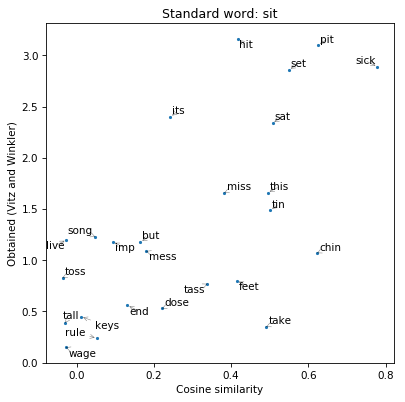

In [39]:
getplot(df, labelx="Cosine similarity", labely="Obtained (Vitz and Winkler)",
       title="Standard word: sit")

Correlation:

In [41]:
np.corrcoef(df["obtained"], df["embedding_cosine"])[0, 1]

0.64616745162692546

Results from Vitz and Winkler's "PPD" metric ("predicted phonemic distance"):

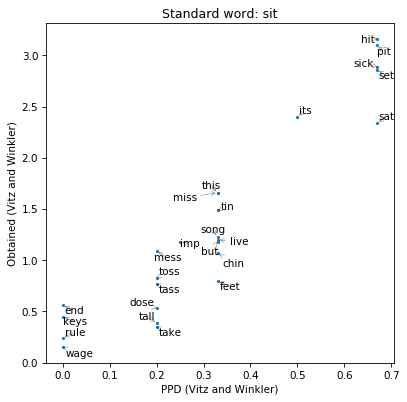

In [42]:
getplot(df, "vw_predicted", "obtained", labelx="PPD (Vitz and Winkler)",
        labely="Obtained (Vitz and Winkler)",
        title="Standard word: sit")

Correlation:

In [43]:
np.corrcoef(df["obtained"], df["vw_predicted"])[0, 1]

0.94106502981668516

## Experiment 2: plant

Vector space results:

In [46]:
df = runexperiment("./vitz-1973-experiment-plant.csv", space, "plant")

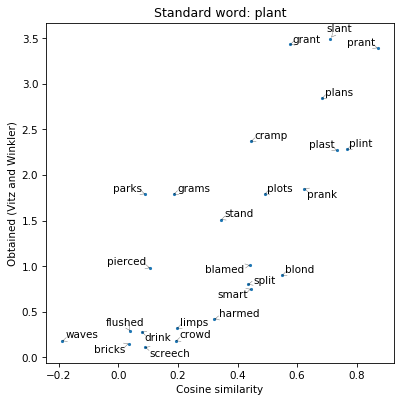

In [47]:
getplot(df, labelx="Cosine similarity", labely="Obtained (Vitz and Winkler)",
       title="Standard word: plant")

Correlation:

In [50]:
np.corrcoef(df["obtained"], df["vw_predicted"])[0, 1]

0.79536452040520444

Vitz and Winkler PPD results:

In [51]:
df = runexperiment("./vitz-1973-experiment-plant.csv", space, "plant")

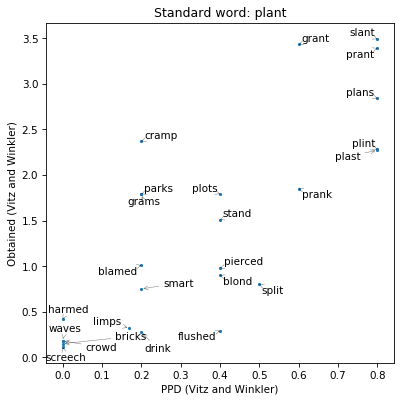

In [52]:
getplot(df, "vw_predicted", "obtained", labelx="PPD (Vitz and Winkler)",
        labely="Obtained (Vitz and Winkler)",
        title="Standard word: plant")

Correlation:

In [53]:
np.corrcoef(df["obtained"], df["embedding_cosine"])[0, 1]

0.77618647906943061

## Experiment 3: wonder

Vector space results:

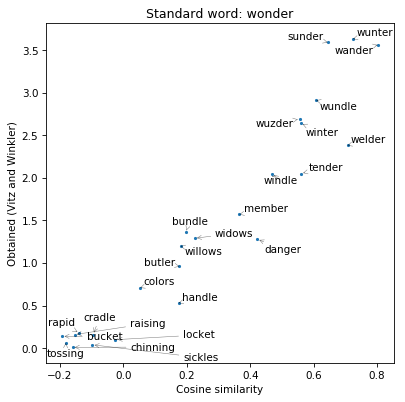

In [54]:
df = runexperiment("./vitz-1973-experiment-wonder.csv", space, "wonder")
getplot(df, labelx="Cosine similarity", labely="Obtained (Vitz and Winkler)",
       title="Standard word: wonder")

Correlation:

In [55]:
np.corrcoef(df["obtained"], df["embedding_cosine"])[0, 1]

0.95750943414944378

Vitz and Winkler results:

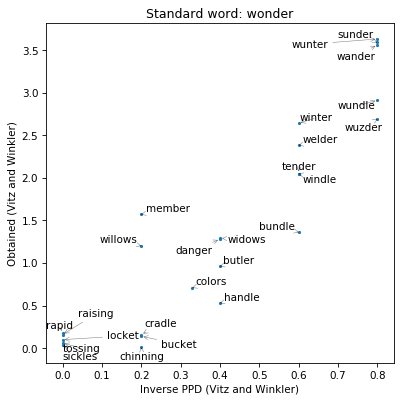

In [56]:
getplot(df, "vw_predicted", "obtained", labelx="Inverse PPD (Vitz and Winkler)", labely="Obtained (Vitz and Winkler)",
       title="Standard word: wonder")

Correlation:

In [58]:
np.corrcoef(df["obtained"], df["vw_predicted"])[0, 1]

0.91742184230511969